In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Loading and Inspecting the data**

In [3]:
# Load and inspect the data

train = pd.read_csv('data/training_set_VU_DM.csv')
test = pd.read_csv('data/test_set_VU_DM.csv')

In [4]:
# Check the shape of the data
print(f"Train shape: {train.shape}")        
print(f"Test shape: {test.shape}")

# Check the first few rows
print(train.head())
print(test.head())

# Columns in the training data
print(f"Columns in train: {train.columns}")
print(f"Column types in train: {train.dtypes}")



Train shape: (4958347, 54)
Test shape: (4959183, 50)
   srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  

**Summary stats**

In [5]:
# Basic summary and statistics of the data
print("\nSummary of training data:")
print(train.describe(include='all'))


Summary of training data:
             srch_id            date_time       site_id  \
count   4.958347e+06              4958347  4.958347e+06   
unique           NaN               198615           NaN   
top              NaN  2012-11-02 14:04:51           NaN   
freq             NaN                   95           NaN   
mean    1.663666e+05                  NaN  9.953133e+00   
std     9.611223e+04                  NaN  7.646890e+00   
min     1.000000e+00                  NaN  1.000000e+00   
25%     8.293600e+04                  NaN  5.000000e+00   
50%     1.665070e+05                  NaN  5.000000e+00   
75%     2.497240e+05                  NaN  1.400000e+01   
max     3.327850e+05                  NaN  3.400000e+01   

        visitor_location_country_id  visitor_hist_starrating  \
count                  4.958347e+06            251866.000000   
unique                          NaN                      NaN   
top                             NaN                      NaN   
freq    

In [26]:

numeric = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_col = train.select_dtypes(include=["object", "boolean"]).columns.tolist()

# I need to manually select columns that have boolean data types
boolean_col = ["promotion_flag", "prop_brand_bool", "srch_saturday_night_bool", "random_bool", "click_bool", "booking_bool",]

# Do we want this?
# for col in boolean_col:
#     train[col] = train[col].astype("bool")

numeric_col = [col for col in numeric if col not in boolean_col]
categorical_col += boolean_col

print("Numeric features:", numeric_col)
print("Categorical features:", categorical_col)

Numeric features: ['srch_id', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_query_affinity_score', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'gross_bookings_usd', 'relevance']
Categorical features: ['date_time', 'promotion_f

In [28]:
numeric_summary = train[numeric_col].describe().T  # transpose for readability
numeric_summary["median"] = train[numeric_col].median()
print(numeric_summary)

                                 count           mean           std       min  \
srch_id                      4958347.0  166366.561096  96112.230102    1.0000   
site_id                      4958347.0       9.953133      7.646890    1.0000   
visitor_location_country_id  4958347.0     175.340453     65.916249    1.0000   
visitor_hist_starrating       251866.0       3.374334      0.692519    1.4100   
visitor_hist_adr_usd          252988.0     176.022659    107.254493    0.0000   
prop_country_id              4958347.0     173.973897     68.345248    1.0000   
prop_id                      4958347.0   70079.179496  40609.920378    1.0000   
prop_starrating              4958347.0       3.180525      1.051024    0.0000   
prop_review_score            4950983.0       3.777777      1.050329    0.0000   
prop_location_score1         4958347.0       2.872589      1.531011    0.0000   
prop_location_score2         3867999.0       0.130385      0.159463    0.0000   
prop_log_historical_price   

**Missing values**

In [17]:
# Missing values in the training data
missing_counts = train.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("\nMissing values in training data:")
#print(missing_counts)

missing_percent = (missing_counts / len(train)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print("\nMissing values percentage in training data:")  
print(missing_percent)


Missing values in training data:

Missing values percentage in training data:
comp1_rate_percent_diff      98.095353
comp6_rate_percent_diff      98.060362
comp1_rate                   97.581250
comp1_inv                    97.387053
comp4_rate_percent_diff      97.356256
gross_bookings_usd           97.208949
comp7_rate_percent_diff      97.206428
comp6_rate                   95.156511
visitor_hist_starrating      94.920364
visitor_hist_adr_usd         94.897735
comp6_inv                    94.736633
comp4_rate                   93.800797
comp7_rate                   93.640058
srch_query_affinity_score    93.598552
comp4_inv                    93.069001
comp7_inv                    92.811677
comp3_rate_percent_diff      90.464625
comp2_rate_percent_diff      88.781786
comp8_rate_percent_diff      87.602118
comp5_rate_percent_diff      83.036706
comp3_rate                   69.056462
comp3_inv                    66.702814
comp8_rate                   61.344900
comp8_inv               

**Exploring by the groups**

Each row in the dataset represents single property shown to a user in a specific search query.

In [32]:
# Unique searches
unique_search_ids = train["srch_id"].nunique()
print("Number of unique search IDs:", unique_search_ids)

# Unique property IDs
unique_hotel_ids = train["prop_id"].nunique()  
print("Number of unique property IDs:", unique_hotel_ids)


# Countries from the users
user_country = train["visitor_location_country_id"].nunique()  
print("Number of countries users are from:", user_country)

# Countries from the hotels
hotel_country = train["prop_country_id"].nunique()  
print("Number of countries where properties are located:", hotel_country)

Number of unique search IDs: 199795
Number of unique property IDs: 129113
Number of countries users are from: 210
Number of countries where properties are located: 172


In [34]:
# How ofetn each hotel appears in the training data
hotel_appearance = train["prop_id"].value_counts()
print("Average times a hotel appears:", hotel_appearance.mean())
print("Hotels appearing only once:", (hotel_appearance == 1).sum())

Average times a hotel appears: 38.40315847358515
Hotels appearing only once: 12868


Top 10 most active user countries:
 visitor_location_country_id
219    2892489
100     495476
55      290461
216     217385
220     174296
129     123681
31       92636
99       67762
59       62066
92       45213
Name: count, dtype: int64


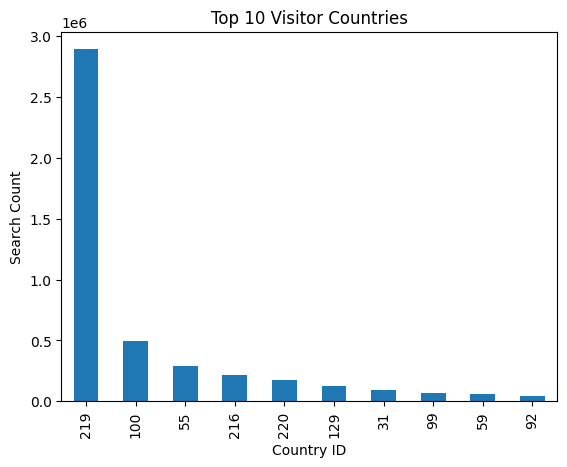

In [35]:
# Countries from where the users are coming from
country_counts = train["visitor_location_country_id"].value_counts().head(10)
print("Top 10 most active user countries:\n", country_counts)
country_counts.plot(kind='bar', title='Top 10 Visitor Countries')
plt.xlabel("Country ID")
plt.ylabel("Search Count")
plt.show()

Average number of hotel results per search: 24.817172601916965
Minimum: 5
Maximum: 38
Standard deviation: 9.113335441723502


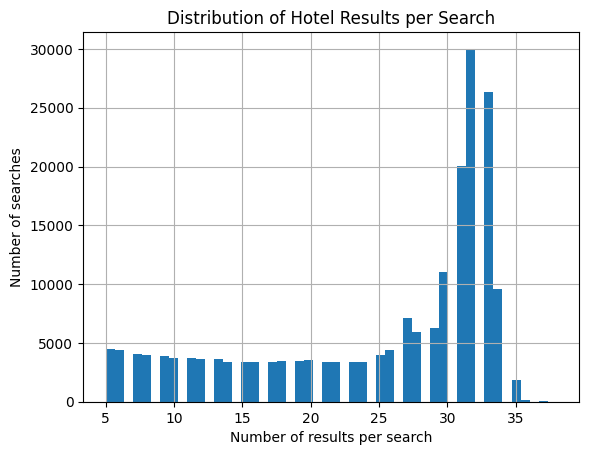

In [8]:
results_per_search = train["srch_id"].value_counts()
print("Average number of hotel results per search:", results_per_search.mean())
print("Minimum:", results_per_search.min())
print("Maximum:", results_per_search.max())
print("Standard deviation:", results_per_search.std())

results_per_search.hist(bins=50)
plt.title("Distribution of Hotel Results per Search")
plt.xlabel("Number of results per search")
plt.ylabel("Number of searches")
plt.show()

- majority of searches returns 30 - 33 hotels, so I will rank around 30 hotels per user, but will be interested in the top 5?
- distribution is skewed (left tail) and that is why average is a bit lower than 30


**Clicked-Booked**

In [9]:
# Value counts
print("Click counts:\n", train["click_bool"].value_counts())
print("\nBooking counts:\n", train["booking_bool"].value_counts())

print("")
print("Click rate:", train["click_bool"].mean())
print("Booking rate:", train["booking_bool"].mean())

Click counts:
 click_bool
0    4736468
1     221879
Name: count, dtype: int64

Booking counts:
 booking_bool
0    4819957
1     138390
Name: count, dtype: int64

Click rate: 0.04474858254172207
Booking rate: 0.027910511305481445


In [10]:
cross = train[["click_bool", "booking_bool"]].value_counts().sort_index()
print("\nClick/Booking combinations:\n", cross)


Click/Booking combinations:
 click_bool  booking_bool
0           0               4736468
1           0                 83489
            1                138390
Name: count, dtype: int64


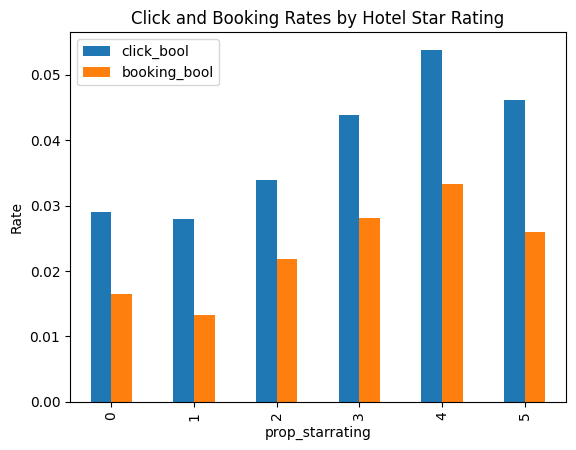

In [ ]:
# Click/booking rates by hotel star rating
train.groupby("prop_starrating")[["click_bool", "booking_bool"]].mean().plot(kind='bar')
plt.title("Click and Booking Rates by Hotel Star Rating")
plt.ylabel("Rate")
plt.show()

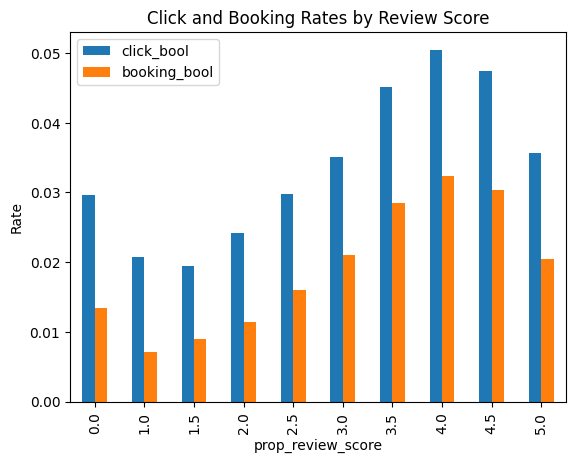

In [37]:
# Click/booking rates by hotel review score
train.groupby("prop_review_score")[["click_bool", "booking_bool"]].mean().plot(kind='bar')
plt.title("Click and Booking Rates by Review Score")
plt.ylabel("Rate")
plt.show()

Checking for each unique search wheteher a hotel was booked or not

In [40]:
# Counting the number of bookings per search
bookings_per_search = train.groupby("srch_id")["booking_bool"].sum()

print("Total number of searches:", len(bookings_per_search))
print("Searches with at least 1 booking:", (bookings_per_search > 0).sum())
print("Searches with more than 1 booking:", (bookings_per_search > 1).sum())
print("Searches with no bookings:", (bookings_per_search == 0).sum())

Total number of searches: 199795
Searches with at least 1 booking: 138390
Searches with more than 1 booking: 0
Searches with no bookings: 61405


Booking/Click rate over time

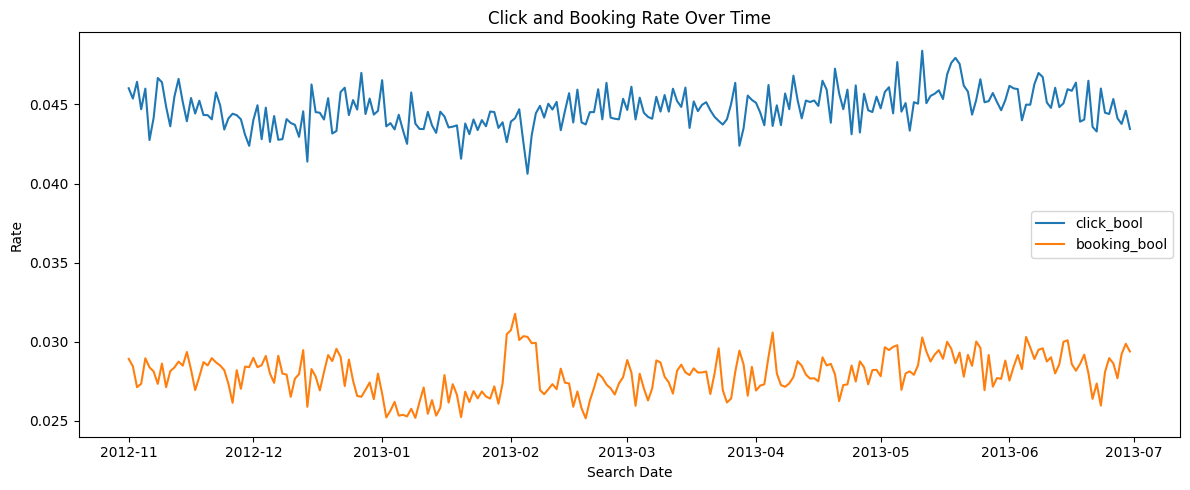

In [52]:
train["date_time"] = pd.to_datetime(train["date_time"])

# Extract date (ignore exact time to group by day)
train["search_date"] = train["date_time"].dt.date

# Group by date to get daily click and booking rates
daily_rates = train.groupby("search_date")[["click_bool", "booking_bool"]].mean()

daily_rates.plot(figsize=(12, 5), title="Click and Booking Rate Over Time")
plt.xlabel("Search Date")
plt.ylabel("Rate")
plt.tight_layout()
plt.show()

**maybe also add:**

Split analysis by country or weekday/weekend

Analyze time-of-day or seasonality trends

**Relevance Score** 

--> reflects how interested the user is in a property 

--> 5 = booked (very relevant)

--> 1 = clicked (somewhat relevant)

--> 0 = ignored (no relevance)

In [ ]:
def relevance(row):
    if row["booking_bool"] == 1:
        return 5
    elif row["click_bool"] == 1:
        return 1
    else:
        return 0

train["relevance"] = train.apply(relevance, axis=1)


In [13]:
train.to_csv("data/train_with_relevance.csv", index=False)

**Correlation matrix**

In [41]:
cols_to_drop = ["srch_id", "prop_id", "date_time"]  # drop IDs and datetime
numeric_for_corr = train.drop(columns=cols_to_drop, errors="ignore").select_dtypes(include=["float64", "int64"])

corr_matrix = numeric_for_corr.corr()

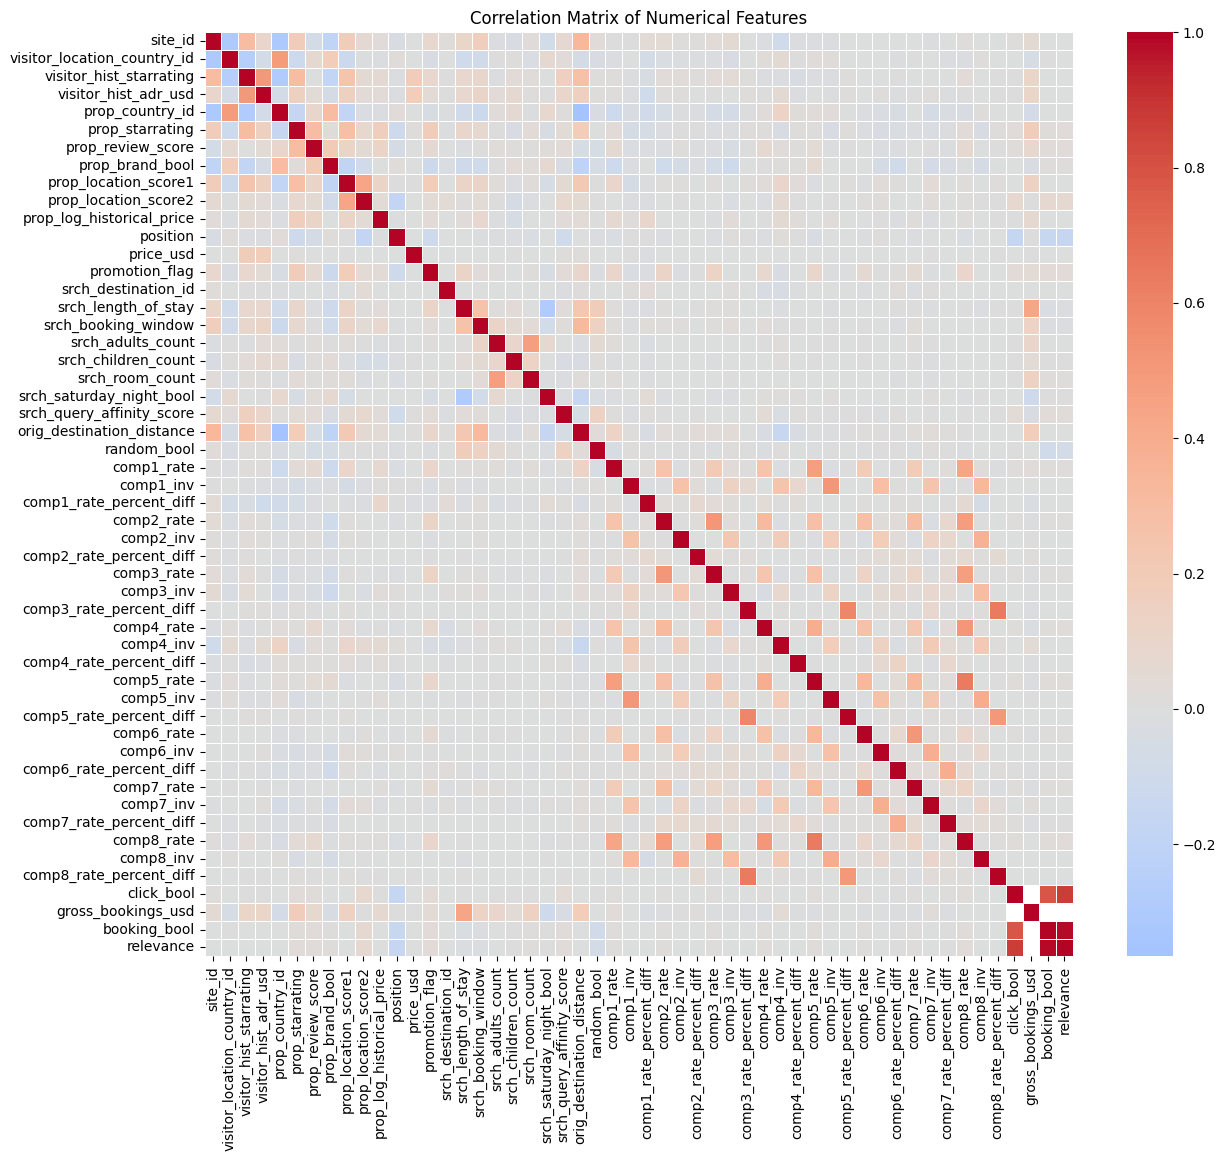

In [42]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

--> we can see that 'click_bool', 'booking_bool', and 'relevance' are strongly correlated, which makes sense since relevance was derived from the two of them (remove them, use only "relevance" for target)

--> compN_rate are also slightly correlated (should we maybe just keep first 2 competitors?)

--> "prop_country_id" and "visitor_location_country_id" also shows a decent positive correlation, while "srch_saturday_night_bool" and "srch_length_of_stay" decent negative correlation


In [51]:
# Unstack and filter for high correlations
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1.0]  # exclude self-correlation
high_corr = high_corr[high_corr > 0.60]  # threshold (we can chgange this based on lietarture)

# Drop duplicate pairs (A-B and B-A)
high_corr = high_corr[~high_corr.index.duplicated()]
print("Highly correlated feature pairs:\n", high_corr)

Highly correlated feature pairs:
 relevance                booking_bool               0.987940
booking_bool             relevance                  0.987940
click_bool               relevance                  0.869782
relevance                click_bool                 0.869782
booking_bool             click_bool                 0.782889
click_bool               booking_bool               0.782889
comp8_rate               comp5_rate                 0.636605
comp5_rate               comp8_rate                 0.636605
comp3_rate_percent_diff  comp8_rate_percent_diff    0.634962
comp8_rate_percent_diff  comp3_rate_percent_diff    0.634962
dtype: float64


**Competitor Features Analysis**

In [55]:
comp_cols = [col for col in train.columns if col.startswith("comp")]


missing_comp = train[comp_cols].isnull().sum().sort_values(ascending=False)
#print("Missing values in competitor features:\n", missing_comp)

# percentage
percentage_comp = 100 * (1 - (missing_comp / len(train)))
print("\n Percentage for competitor features:\n", percentage_comp)


 Percentage for competitor features:
 comp1_rate_percent_diff     1.904647
comp6_rate_percent_diff     1.939638
comp1_rate                  2.418750
comp1_inv                   2.612947
comp4_rate_percent_diff     2.643744
comp7_rate_percent_diff     2.793572
comp6_rate                  4.843489
comp6_inv                   5.263367
comp4_rate                  6.199203
comp7_rate                  6.359942
comp4_inv                   6.930999
comp7_inv                   7.188323
comp3_rate_percent_diff     9.535375
comp2_rate_percent_diff    11.218214
comp8_rate_percent_diff    12.397882
comp5_rate_percent_diff    16.963294
comp3_rate                 30.943538
comp3_inv                  33.297186
comp8_rate                 38.655100
comp8_inv                  40.083984
comp2_rate                 40.833608
comp2_inv                  42.963290
comp5_rate                 44.820845
comp5_inv                  47.596911
dtype: float64


--> as we see from the percentage coverage of the competitors features, most of them have a very small coverage, soooo
this means **Sebaastian** I would say not to use the ones that have lower coverage from ~20%, but rather only keep the ones that have better coverage ("comp2/3/5/8")

--> and since there are still a lot of NaNs the rest we can impute or engineer

In [58]:
# print("\nValue counts for comp2_rate:\n", train["comp2_rate"].value_counts(dropna=False))
# print("\nValue counts for comp2_inv:\n", train["comp2_inv"].value_counts(dropna=False))
print("\nValue counts for comp3_rate:\n", train["comp3_rate"].value_counts(dropna=False))
print("\nValue counts for comp3_inv:\n", train["comp3_inv"].value_counts(dropna=False))
print("\nValue counts for comp5_rate:\n", train["comp5_rate"].value_counts(dropna=False))
print("\nValue counts for comp5_inv:\n", train["comp5_inv"].value_counts(dropna=False))


Value counts for comp3_rate:
 comp3_rate
 NaN    3424059
 0.0    1212580
 1.0     174118
-1.0     147590
Name: count, dtype: int64

Value counts for comp3_inv:
 comp3_inv
 NaN    3307357
 0.0    1501978
 1.0     122194
-1.0      26818
Name: count, dtype: int64

Value counts for comp5_rate:
 comp5_rate
 NaN    2735974
 0.0    1616232
 1.0     328268
-1.0     277873
Name: count, dtype: int64

Value counts for comp5_inv:
 comp5_inv
 NaN    2598327
 0.0    2184479
 1.0     148457
-1.0      27084
Name: count, dtype: int64


**Outlier Detection**